In [65]:
import numpy as np
import matplotlib.pyplot as plt

Laplace's equation:

### $\nabla^2 \mathbf{V} = 0$

or more verbosely:

### $\frac{\partial ^2\mathbf{V}}{\partial x^2} + \frac{\partial ^2\mathbf{V}}{\partial y^2} = 0$

to be able to computationally solve this, it can be approximated:

### $\frac{\mathbf{V}(x_{i+1}, y_j) - 2\mathbf{V}(x_i, y_j) +\mathbf{V}(x_{i-1}, y_j)}{(\mathbf{\Delta x})^2} + \frac{\mathbf{V}(x_i, y_{j+1}) - 2\mathbf{V}(x_i, y_j) + \mathbf{V}(x_i, y_{j-1})}{(\mathbf{\Delta y})^2} = 0$

if we make the discrete grid uniform, then $\Delta x == \Delta y == a$, and so:

### $\frac{\mathbf{V}(x_{i+1}, y_j) - 2\mathbf{V}(x_i, y_j) +\mathbf{V}(x_{i-1}, y_j)}{a^2} + \frac{\mathbf{V}(x_i, y_{j+1}) - 2\mathbf{V}(x_i, y_j) + \mathbf{V}(x_i, y_{j-1})}{\mathbf{a}^2} = 0$

### $\frac{\mathbf{V}(x_{i+1}, y_j) - 2\mathbf{V}(x_i, y_j) +\mathbf{V}(x_{i-1}, y_j) + \mathbf{V}(x_i, y_{j+1}) - 2\mathbf{V}(x_i, y_j) + \mathbf{V}(x_i, y_{j-1})}{\mathbf{a}^2} = 0$

### $\mathbf{V}(x_{i+1}, y_j) - 2\mathbf{V}(x_i, y_j) +\mathbf{V}(x_{i-1}, y_j) + \mathbf{V}(x_i, y_{j+1}) - 2\mathbf{V}(x_i, y_j) + \mathbf{V}(x_i, y_{j-1}) = 0$

### $\mathbf{V}(x_i, y_j) = \frac{\mathbf{V}(x_{i+1}, y_j) + \mathbf{V}(x_{i-1}, y_j) + \mathbf{V}(x_i, y_{j+1}), \mathbf{V}(x_i, y_{j-1})}{4}$

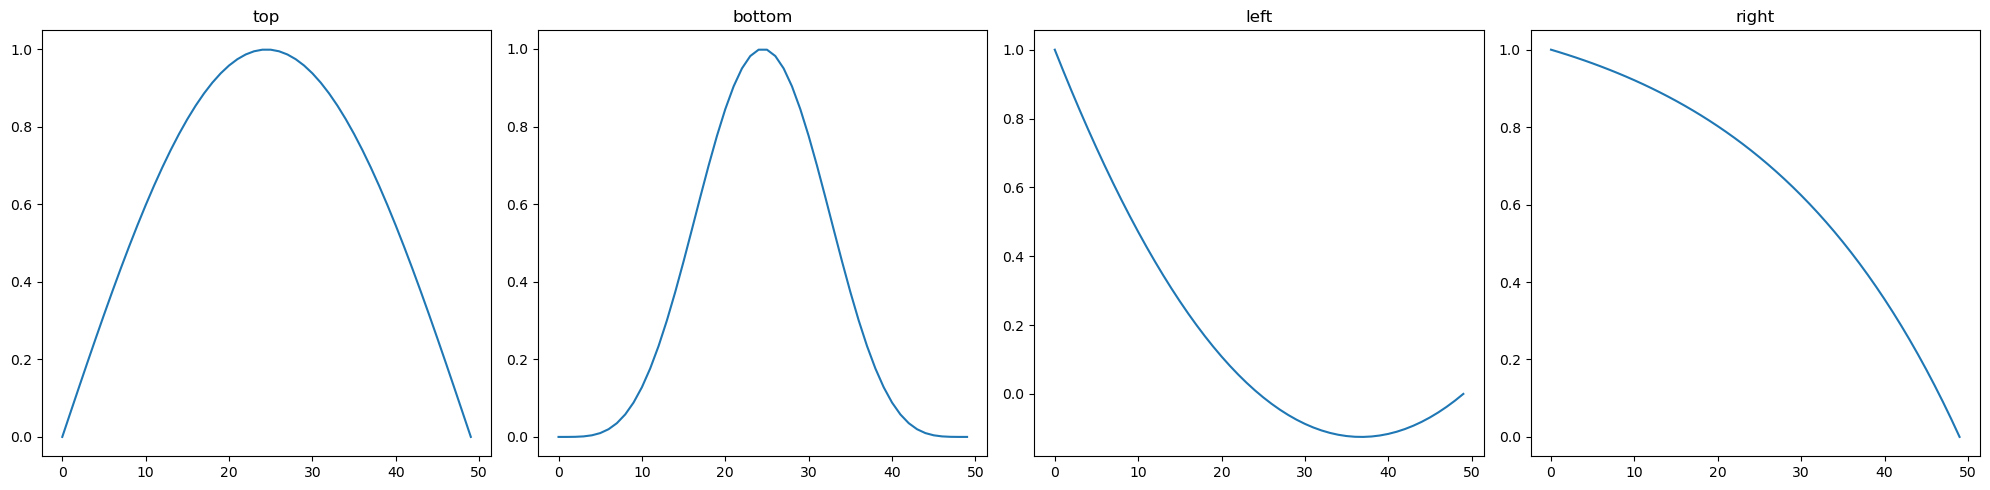

In [137]:
# Boundary conditions
SIZE = 50
lsp = np.linspace(-1, 1, SIZE)
top = np.cos(np.pi*lsp / 2)
bottom = top**4
left = 0.5 * (lsp**2 - lsp)
right = 1 / (np.e**(-1) - np.e) * (np.exp(lsp) - np.e)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].plot(top)
ax[0].set_title('top')
ax[1].plot(bottom)
ax[1].set_title('bottom')
ax[2].plot(left)
ax[2].set_title('left')
ax[3].plot(right)
ax[3].set_title('right')
fig.tight_layout()

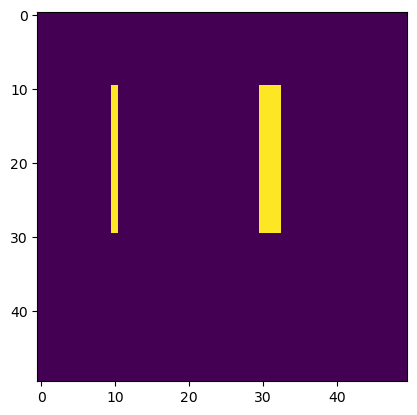

In [193]:
fixed = np.zeros((SIZE, SIZE))
fixed[10:30, 10:11] = True
fixed[10:30, 30:33] = True
plt.imshow(fixed)

In [163]:
def iterate_potential(potential, iterations):
    len = potential.shape[0]
    for n in range(iterations):
        for i in range(1, len-1):
            for j in range(1, len-1):
                if not (fixed.T[i, j] > 0):
                    potential[j][i] = 0.25 * (potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return potential

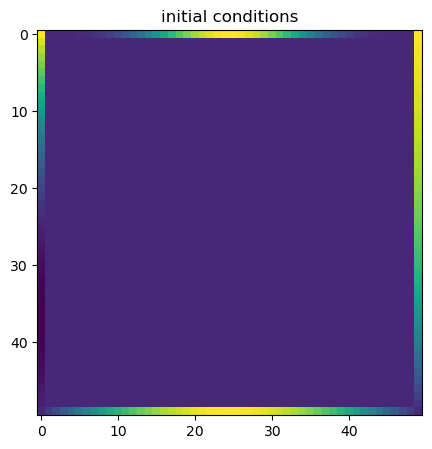

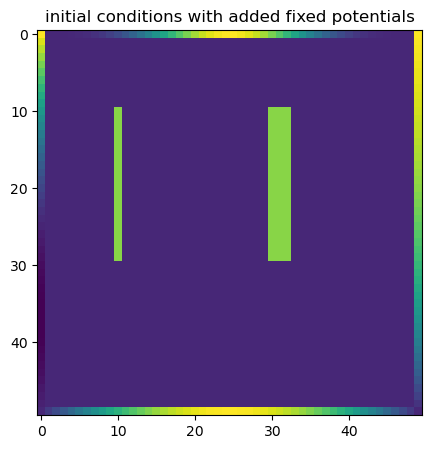

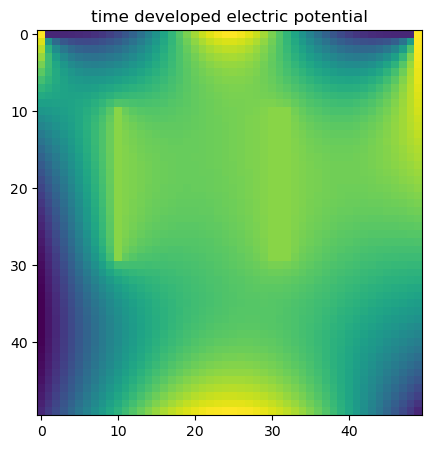

Text(0.5, 1.0, 'Electric field')

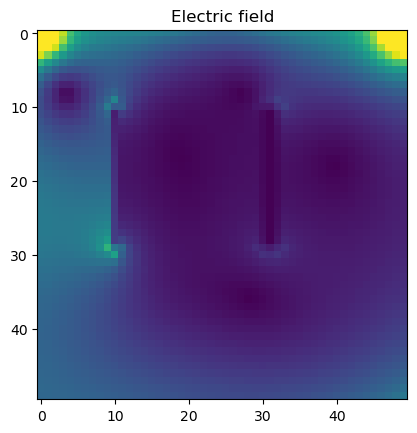

In [203]:
potential = np.zeros((SIZE, SIZE))
potential[0, :] = bottom
potential[-1, :] = top
potential[:, 0] = left
potential[:, -1] = right

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(potential)
plt.title('initial conditions')
plt.show()

potential[fixed>0] = 0.8
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(potential)
plt.title('initial conditions with added fixed potentials')
plt.show()
potential = iterate_potential(potential, 300)
fig, ax = plt.subplots(figsize=(5, 5))
plt.title('time developed electric potential')
ax.imshow(potential)
plt.show()

Ex, Ey = np.gradient(-potential)
E_mag = np.sqrt(Ex**2 + Ey**2)
plt.imshow(E_mag, vmin=0, vmax=0.2)
plt.title('Electric field')